<a href="https://colab.research.google.com/github/AlexMendozaPrado/Integraci-n-de-seguridad-inform-tica-en-redes-y-sistemas-de-software-Gpo-405-/blob/main/IncedioForestalSimulacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulacion de incendio forestal

El incendio forestal es un fenómeno natural que, cuando es provocado por factores humanos o se sale de control, puede tener consecuencias devastadoras para los ecosistemas y comunidades cercanas. Modelar y simular cómo se propaga un incendio puede ayudar a entender su dinámica y a tomar decisiones informadas para su prevención y control. En este documento, presentamos un modelo basado en autómatas celulares para simular la propagación de un incendio forestal y analizamos los resultados obtenidos.
<center>

</center>

## Reglas

1. Estados del Árbol:
Cada árbol en el modelo puede existir en uno de los tres estados posibles:

Vivo: Indica que el árbol está sano y aún no ha sido afectado por el fuego.
En Llamas: Denota que el árbol está actualmente ardiendo, siendo consumido por el fuego.
Quemado: Significa que el árbol ha sido completamente consumido por el fuego y ya no puede arder más.
2. Transiciones entre Estados:

De Vivo a En Llamas:
Un árbol en estado "vivo" se encuentra susceptible a las llamas. Si tiene al menos un vecino inmediato (ya sea horizontal, vertical o diagonalmente adyacente) que está "en llamas", entonces el árbol cambia su estado a "en llamas". Esta regla simula cómo el fuego se propaga de un árbol a otro debido a la proximidad y al contacto directo con las llamas.

De En Llamas a Quemado:
Una vez que un árbol está "en llamas", no se mantiene en ese estado indefinidamente. En el siguiente paso de tiempo, este árbol cambia su estado a "quemado". Esta transición refleja el hecho de que, una vez que un árbol comienza a arder, eventualmente es consumido completamente por el fuego.

Quemado (Estado Final):
El estado "quemado" es un estado final. Es decir, una vez que un árbol ha sido quemado, no puede regresar a los estados "vivo" o "en llamas". Permanece en el estado "quemado" por el resto de la simulación.

3. Dinámica del Modelo:

El incendio se propaga en el bosque de acuerdo con las reglas de transición mencionadas anteriormente. Inicialmente, solo unos pocos árboles están "en llamas", actuando como el punto de partida del fuego. A medida que la simulación avanza, estos árboles "en llamas" provocan que sus vecinos también se incendien, y así sucesivamente, hasta que el fuego se haya propagado a todos los árboles susceptibles o hasta que ya no haya más árboles adyacentes "vivos" para continuar con la propagación.



In [ ]:
!python3 -m pip install mesa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 103.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 116.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 119.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 120.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.0/241.0 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.6/106.6 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━

## Imports

Antes de empezar a crear el modelo del juego de la vida con multiagentes es necesario tener instalado los siguientes paquetes:
- `python`: asegúrense de usar la versión 3+.
- `mesa`: el framework de Python para el modelado de agentes.
- `numpy`: es una biblioteca de Python para el manejo de matrices, arreglos, manipulación matemática, lógica y mucho más.
- `matplotlib`: es una biblioteca para crear visualizaciones estáticas, animadas e interactivas en Python.

Para poder modelar el juego de la vida usando el framework de `mesa` es necesario importar dos clases: una para el modelo general, y otro para los agentes.

In [ ]:
# 'Model' sirve para definir los atributos a nivel del modelo, maneja los agentes
# 'Agent' es la unidad atómica y puede ser contenido en múltiples instancias en los modelos
from mesa import Agent, Model

# 'SingleGrid' sirve para forzar a un solo objeto por celda (nuestro objetivo en este "juego")
from mesa.space import SingleGrid

# 'SimultaneousActivation' habilita la opción de activar todos los agentes de manera simultanea.
from mesa.time import SimultaneousActivation

# 'DataCollector' permite obtener el grid completo a cada paso (o generación), útil para visualizar
from mesa.datacollection import DataCollector

# 'matplotlib' lo usamos para graficar/visualizar como evoluciona el autómata celular.
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mlp
import matplotlib.animation as animation
plt.rcParams["animation.html"] = "jshtml"
mlp.rcParams['animation.embed_limit'] = 2**128

# Definimos los siguientes paquetes para manejar valores númericos: 'numpy' & 'pandas'
import numpy as np
import pandas as pd

# Definimos otros paquetes que vamos a usar para medir el tiempo de ejecución de nuestro algoritmo.
import time
import datetime

## Crear el modelo

Antes que nada el presente modelo se encuentra basado en el [tutorial introductorio](https://mesa.readthedocs.io/en/latest/tutorials/intro_tutorial.html). Se modificó para que funcionara con el presente problema pero en esencia es lo mismo.

In [ ]:
class TreeAgent(Agent):
    """
    Representa un árbol que puede estar en uno de los siguientes estados:
    - Vivo (0)
    - En llamas (1)
    - Quemado (2)
    """

    VIVO = 0
    EN_LLAMAS = 1
    QUEMADO = 2

    def __init__(self, unique_id, model, initial_state=VIVO):
        super().__init__(unique_id, model)
        self.state = initial_state
        self.next_state = None

    def step(self):
        vecinos = self.model.grid.get_neighbors(self.pos, moore=True, include_center=False)
        if self.state == TreeAgent.VIVO:
            for vecino in vecinos:
                if isinstance(vecino, TreeAgent) and vecino.state == TreeAgent.EN_LLAMAS:
                    self.next_state = TreeAgent.EN_LLAMAS
                    break
            else:
                self.next_state = TreeAgent.VIVO
        elif self.state == TreeAgent.EN_LLAMAS:
            self.next_state = TreeAgent.QUEMADO
        else:
            self.next_state = TreeAgent.QUEMADO

    def advance(self):
        self.state = self.next_state
        self.next_state = None


class ForestFireModel(Model):
    """
    Modelo que simula un incendio forestal.
    """
    def __init__(self, width, height, density=0.7, fire_start_percent=0.05):
        self.width = width
        self.height = height
        self.grid = SingleGrid(self.width, self.height, True)
        self.schedule = SimultaneousActivation(self)

        for (content, pos) in self.grid.coord_iter():
            if np.random.random() < density:
                tree = TreeAgent(pos, self)
                # Encender algunos árboles basándose en fire_start_percent
                if np.random.random() < fire_start_percent:
                    tree.state = TreeAgent.EN_LLAMAS
                self.grid.place_agent(tree, pos)
                self.schedule.add(tree)

        self.datacollector = DataCollector(
    model_reporters={
        "Grid": self.get_grid,
        "Live": lambda m: self.count_trees_in_state(TreeAgent.VIVO),
        "OnFire": lambda m: self.count_trees_in_state(TreeAgent.EN_LLAMAS),
        "Burned": lambda m: self.count_trees_in_state(TreeAgent.QUEMADO)
    }
)


    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()

    def get_grid(self):
        grid = np.zeros((self.grid.width, self.grid.height))
        for cell in self.grid.coord_iter():
            cell_content, pos = cell
            x, y = pos
            if isinstance(cell_content, TreeAgent):
                grid[x][y] = cell_content.state
        return grid

    def count_trees_in_state(self, state):
        count = 0
        for agent in self.schedule.agents:
            if agent.state == state:
               count += 1
        return count




# Ejecución del modelo
A continuación corremos el modelo

In [ ]:
# Definimos el tamaño del Grid ..> 7 x 7
GRID_SIZE = 100

# Definimos el número de generaciones a correr
NUM_GENERATIONS = 50

# Registramos el tiempo de inicio y corremos el modelo
start_time = time.time()

model = ForestFireModel(GRID_SIZE, GRID_SIZE, fire_start_percent=0.05)
for i in range(NUM_GENERATIONS):
    model.step()
final_time = time.time()

# Imprimimos el tiempo que le tomó correr al modelo.
print('Tiempo de ejecución:', str(datetime.timedelta(seconds=(final_time - start_time))))

Tiempo de ejecución: 0:00:01.359699


Obtenemos la información que almacenó el colector, este nos entregará un DataFrame de pandas que contiene toda la información.

In [ ]:
all_grids = model.datacollector.get_model_vars_dataframe()

Graficamos la información usando `matplotlib`

In [ ]:
all_grids

,Grid
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0,..."
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 2.0, 2.0,..."
3,"[[0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 2.0, 2.0, 2.0,..."
4,"[[0.0, 0.0, 0.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0,..."
5,"[[0.0, 0.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0,..."
6,"[[0.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0,..."
7,"[[0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0,..."
8,"[[0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0,..."
9,"[[0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0,..."


In [ ]:
%%capture

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7,7))

axs.set_xticks([])
axs.set_yticks([])

colors = []
colors.append(np.array([0.0, 1.0, 0.0, 1]))  # Verde para árboles vivos
colors.append(np.array([1.0, 0.0, 0.0, 1]))  # Rojo para árboles en llamas
colors.append(np.array([0.5, 0.5, 0.5, 1]))  # Gris para árboles quemados
colormap = mlp.colors.ListedColormap(colors)

patch_grid = axs.imshow(all_grids['Grid'].iloc[0], cmap=colormap, vmin=0, vmax=2)

def animate(i):
    patch_grid.set_data(all_grids['Grid'].iloc[i])

anim = animation.FuncAnimation(fig, animate, frames=NUM_GENERATIONS,interval = 500)


In [ ]:
anim

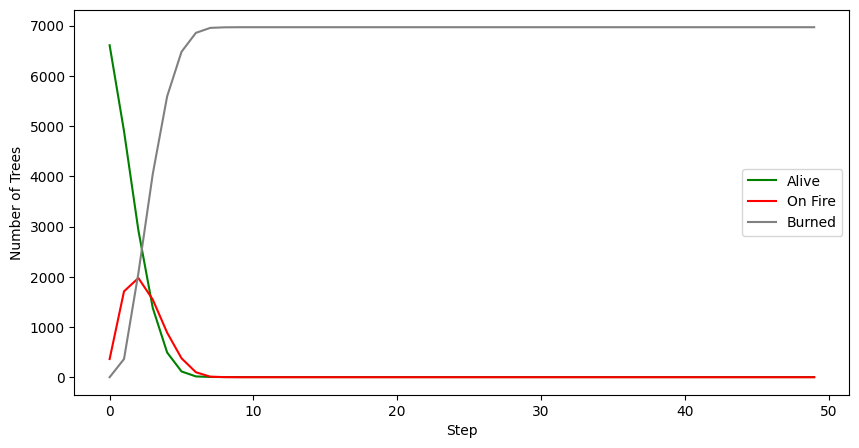

In [ ]:
all_data = model.datacollector.get_model_vars_dataframe()

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
axs.set_xlabel("Step")
axs.set_ylabel("Number of Trees")
axs.plot(all_data["Live"], label="Alive", color='green')
axs.plot(all_data["OnFire"], label="On Fire", color='red')
axs.plot(all_data["Burned"], label="Burned", color='gray')
axs.legend()
plt.show()


# Batch simulation

In [ ]:
NUM_REPS = 100
GRID_SIZE = 10
NUM_GENERATIONS = 1000

model = GameLifeModel(GRID_SIZE, GRID_SIZE)

batch_data = dict(time=[], alive=[])
for _ in range(NUM_REPS):
    start_time = time.time()

    model.reset()
    for i in range(NUM_GENERATIONS):
        model.step()
    final_time = time.time()

    all_grids = model.datacollector.get_model_vars_dataframe()

    batch_data['time'].append(final_time - start_time)
    batch_data['alive'].append(all_grids['Live'].to_numpy())


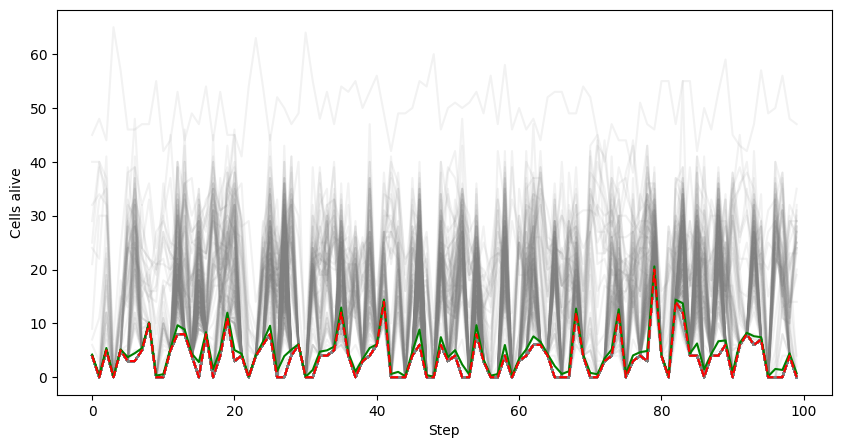

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,5))

axs.set_xlabel("Step")
axs.set_ylabel("Cells alive")

#axs.set_prop_cycle('color', list(plt.cm.(np.linspace(0, 1, NUM_REPS))))
plt.plot(batch_data['alive'], color='Grey', alpha=0.1)

plt.plot(np.average(np.array(batch_data['alive']), axis=1), color='Green')
plt.plot(np.median(np.array(batch_data['alive']), axis=1), color='Red', linestyle='dashed')

plt.show()